# Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

Training with linear kernel...


C:\Users\edeng\AppData\Local\Temp\ipykernel_21708\1971925478.py:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', label='Decision Boundary')


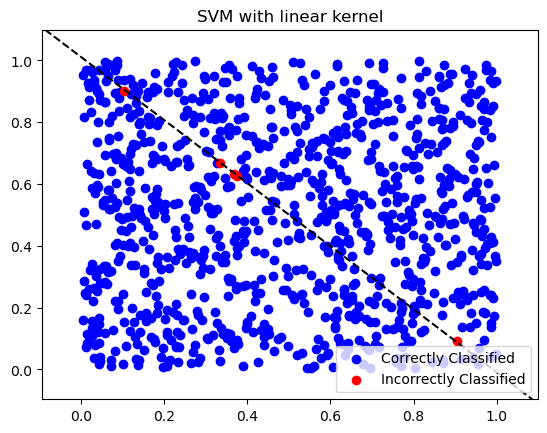

Training with poly kernel...


C:\Users\edeng\AppData\Local\Temp\ipykernel_21708\1971925478.py:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', label='Decision Boundary')


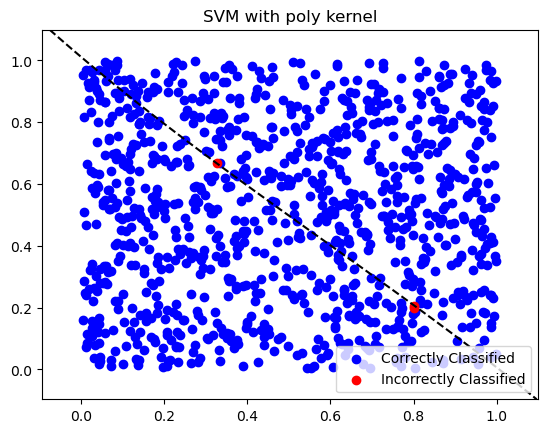

Training with rbf kernel...


C:\Users\edeng\AppData\Local\Temp\ipykernel_21708\1971925478.py:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', label='Decision Boundary')


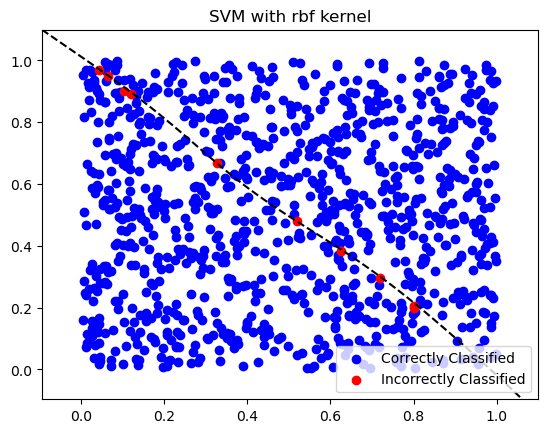

linear kernel:
Training time: 0.0267 seconds
Testing time: 0.0284 seconds
Accuracy: 0.9950

poly kernel:
Training time: 0.0246 seconds
Testing time: 0.0081 seconds
Accuracy: 0.9970

rbf kernel:
Training time: 0.0140 seconds
Testing time: 0.0650 seconds
Accuracy: 0.9900

The most suitable kernel is poly, with accuracy of 0.9970


In [2]:
# Step 1: Generate the train dataset
np.random.seed(42)
X_train = np.random.rand(1000, 2)
y_train = (X_train[:, 1] > 1 - X_train[:, 0]).astype(int)

# Generate the test dataset
X_test = np.random.rand(1000, 2)

# Step 2: Train and Evaluate SVM Models with Different Kernels
kernels = ['linear', 'poly', 'rbf']
train_times = []
test_times = []
accuracies = []

for kernel in kernels:
    print(f"Training with {kernel} kernel...")

    # Measure training time
    start_train_time = time.time()
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    end_train_time = time.time()
    train_times.append(end_train_time - start_train_time)

    # Measure testing time and classify points
    start_test_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end_test_time = time.time()
    test_times.append(end_test_time - start_test_time)

    # Evaluate accuracy on the training set
    accuracy = accuracy_score(y_train, y_pred_train)
    accuracies.append(accuracy)

    # Step 3: Plot the results
    plt.figure()
    plt.title(f"SVM with {kernel} kernel")
    
    # Correctly classified points
    plt.scatter(X_train[y_train == y_pred_train][:, 0], X_train[y_train == y_pred_train][:, 1], color='blue', label='Correctly Classified')
    
    # Incorrectly classified points
    plt.scatter(X_train[y_train != y_pred_train][:, 0], X_train[y_train != y_pred_train][:, 1], color='red', label='Incorrectly Classified')
    
    # Decision boundary (separating line)
    x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', label='Decision Boundary')

    plt.legend()
    plt.show()

# Step 4: Compare Training and Testing Times
for i, kernel in enumerate(kernels):
    print(f"{kernel} kernel:")
    print(f"Training time: {train_times[i]:.4f} seconds")
    print(f"Testing time: {test_times[i]:.4f} seconds")
    print(f"Accuracy: {accuracies[i]:.4f}")
    print("")

# Choose the most suitable kernel
best_kernel_idx = np.argmax(accuracies)
best_kernel = kernels[best_kernel_idx]
print(f"The most suitable kernel is {best_kernel}, with accuracy of {accuracies[best_kernel_idx]:.4f}")


Training with N=100, P=2...
Training with N=1000, P=2...
Training with N=5000, P=2...
Training with N=100, P=5...
Training with N=1000, P=5...
Training with N=5000, P=5...
Training with N=100, P=10...
Training with N=1000, P=10...
Training with N=5000, P=10...
Training with N=100, P=20...
Training with N=1000, P=20...
Training with N=5000, P=20...
Training with N=100, P=50...
Training with N=1000, P=50...
Training with N=5000, P=50...
Training with N=100, P=100...
Training with N=1000, P=100...
Training with N=5000, P=100...


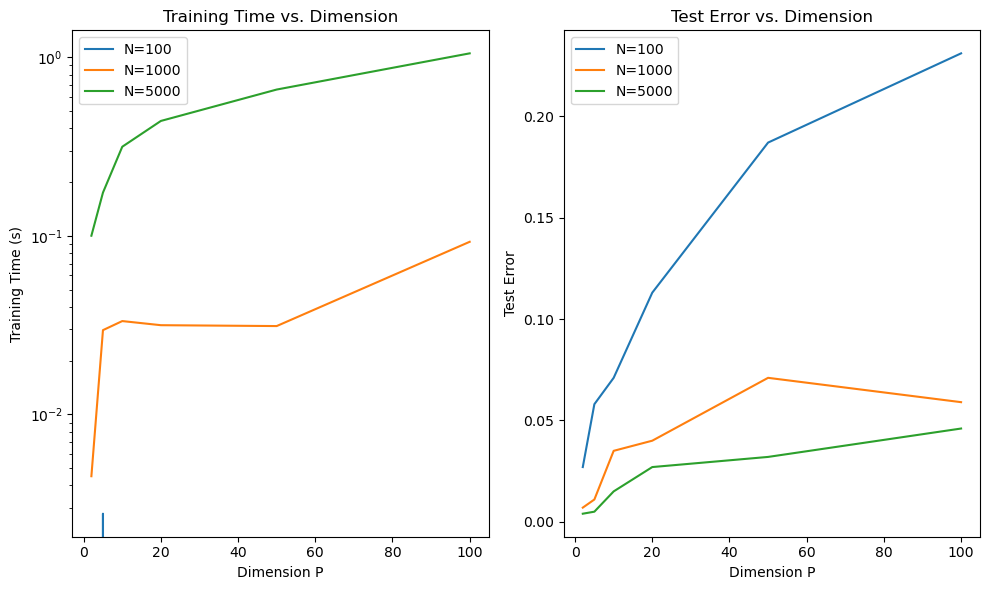

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Parameters
dimensions = [2, 5, 10, 20, 50, 100]  # Different dimensionalities
N_values = [100, 1000, 5000]  # Different number of train samples
P_fixed = 50  # Fixed dimension for testing N < P and N > P
num_test_samples = 1000  # Fixed number of test samples

train_times = []
test_times = []
test_errors = []

for P in dimensions:
    for N in N_values:
        print(f"Training with N={N}, P={P}...")

        # Step 1: Generate Higher-Dimensional Data
        X_train = np.random.rand(N, P)
        y_train = (X_train[:, 1] > 1 - X_train[:, 0]).astype(int)
        
        # Ensure balanced dataset
        idx_class0 = np.where(y_train == 0)[0]
        idx_class1 = np.where(y_train == 1)[0]
        num_class0 = len(idx_class0)
        num_class1 = len(idx_class1)
        min_class = min(num_class0, num_class1)
        
        X_train_balanced = np.vstack((X_train[idx_class0[:min_class]], X_train[idx_class1[:min_class]]))
        y_train_balanced = np.hstack((y_train[idx_class0[:min_class]], y_train[idx_class1[:min_class]]))
        
        X_test = np.random.rand(num_test_samples, P)
        
        # Step 2: Classify Points Using the Chosen Kernel (Polynomial)
        start_train_time = time.time()
        model = SVC(kernel='poly')
        model.fit(X_train_balanced, y_train_balanced)
        end_train_time = time.time()
        train_times.append(end_train_time - start_train_time)

        start_test_time = time.time()
        y_pred_test = model.predict(X_test)
        end_test_time = time.time()
        test_times.append(end_test_time - start_test_time)

        # Evaluate test error (assuming balanced classes for simplicity)
        y_test_true = (X_test[:, 1] > 1 - X_test[:, 0]).astype(int)
        test_error = 1 - accuracy_score(y_test_true, y_pred_test)
        test_errors.append(test_error)

# Step 3: Plot Results

plt.figure(figsize=(10, 6))

# Plot Training Times
plt.subplot(1, 2, 1)
for i, N in enumerate(N_values):
    plt.plot(dimensions, train_times[i::len(N_values)], label=f'N={N}')
plt.xlabel('Dimension P')
plt.yscale('log')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs. Dimension')
plt.legend()

# Plot Test Errors
plt.subplot(1, 2, 2)
for i, N in enumerate(N_values):
    plt.plot(dimensions, test_errors[i::len(N_values)], label=f'N={N}')
plt.xlabel('Dimension P')
plt.ylabel('Test Error')
plt.title('Test Error vs. Dimension')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\edeng\AppData\Local\Temp\ipykernel_21708\2176024155.py:51: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', label='Decision Boundary')


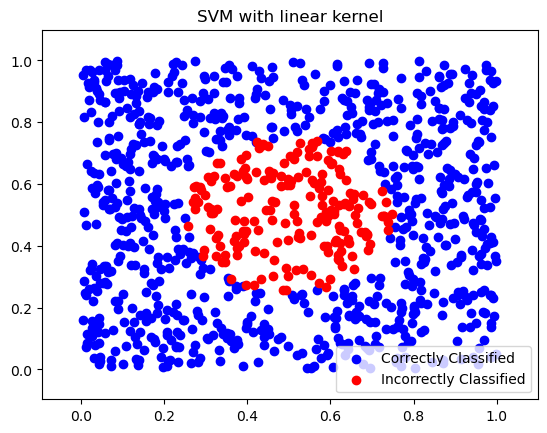

C:\Users\edeng\AppData\Local\Temp\ipykernel_21708\2176024155.py:51: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', label='Decision Boundary')


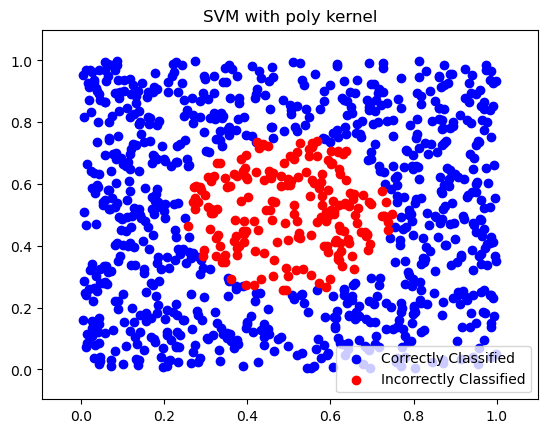

Accuracy with linear kernel: 0.8140
Accuracy with poly kernel: 0.8140


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate the dataset with a circular boundary
np.random.seed(42)
X_train = np.random.rand(1000, 2)
center = np.array([0.5, 0.5])
radius = 0.25
y_train = (np.linalg.norm(X_train - center, axis=1) <= radius).astype(int)

# Generate the test dataset
X_test = np.random.rand(1000, 2)

# Step 2: Train SVM Models with Linear and Polynomial (degree 2) Kernels
kernels = ['linear', 'poly']
degree = 2  # For polynomial kernel
models = {}

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=degree)
    else:
        model = SVC(kernel=kernel)
    
    model.fit(X_train, y_train)
    models[kernel] = model

# Step 3: Plot the results
for kernel in kernels:
    model = models[kernel]
    
    y_pred_train = model.predict(X_train)
    
    plt.figure()
    plt.title(f"SVM with {kernel} kernel")
    
    # Correctly classified points
    plt.scatter(X_train[y_train == y_pred_train][:, 0], X_train[y_train == y_pred_train][:, 1], color='blue', label='Correctly Classified')
    
    # Incorrectly classified points
    plt.scatter(X_train[y_train != y_pred_train][:, 0], X_train[y_train != y_pred_train][:, 1], color='red', label='Incorrectly Classified')
    
    # Decision boundary
    x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', label='Decision Boundary')

    plt.legend()
    plt.show()

# Step 4: Evaluate and compare accuracy
for kernel in kernels:
    model = models[kernel]
    y_pred_test = model.predict(X_test)
    y_test_true = (np.linalg.norm(X_test - center, axis=1) <= radius).astype(int)
    accuracy = accuracy_score(y_test_true, y_pred_test)
    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")
